In [1]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt

Using matplotlib backend: TkAgg


In [4]:
filename = '/home/jaseung/Labshare/Experiments/DR1/Data/WiscCST/190704/QP_Parity_binary_25us_20000by288.txt'
data2D = np.loadtxt(filename, delimiter=',')

(r, c) = data2D.shape

data2D_FFT_magSqr= data2D.copy()

for i in range(c):
    data2D_FFT_magSqr[:, i] = np.absolute(np.fft.fft(data2D[:,i]))**2

In [13]:
traceIndex = 50
trace = data2D_FFT_magSqr[:,traceIndex]

In [14]:
plt.plot(trace)
plt.yscale('log')
plt.xscale('log')

In [19]:
test = np.mean(data2D_FFT, axis=1)

# Measurement histrogram and S-curve

In [2]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

xg, xe = -1, 1
sig_g, sig_e =  1.5, 1.5

x = np.linspace(-5, 5, 1000)
yg = lambda x: np.exp(-((x-xg)/sig_g)**2)
ye = lambda x: np.exp(-((x-xe)/sig_e)**2)

yg_integ_func = lambda t: integrate.quad(yg, x[0], t)
ye_integ_func = lambda t: integrate.quad(ye, x[0], t)

yg_integ = [yg_integ_func(t) for t in x]
ye_integ = [ye_integ_func(t) for t in x]


plt.plot(x, yg(x), x,ye(x))
plt.plot(x, yg_integ, x, ye_integ)


Using matplotlib backend: TkAgg


# Lorentzian power spectrum

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


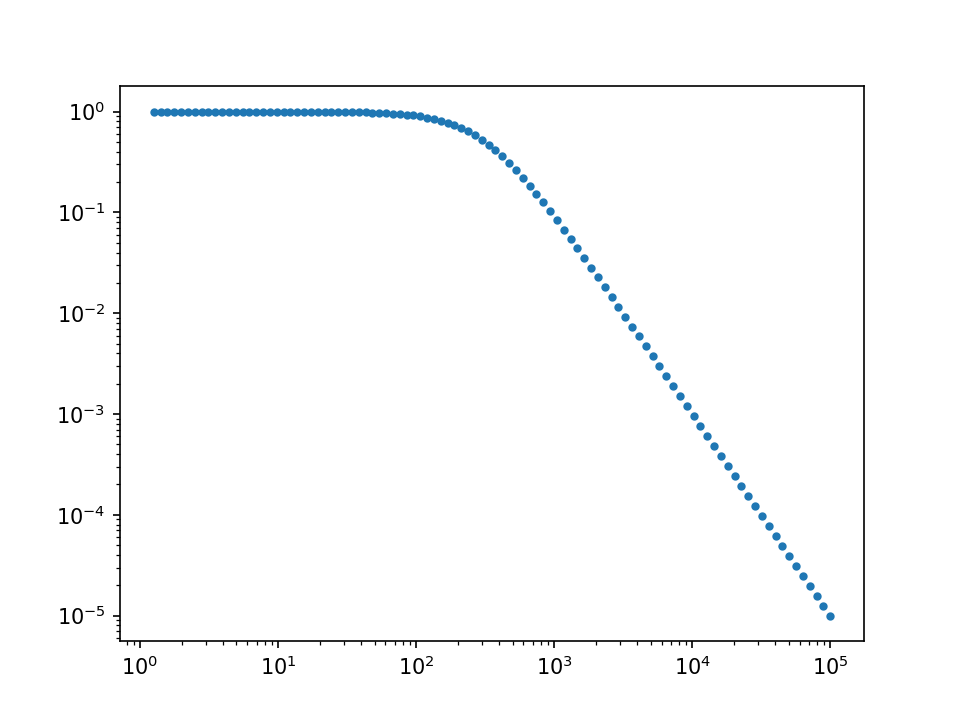

In [11]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt

f = np.logspace(0.1, 5, 100)
# f = np.linspace(0.1, 1e5, 10000)
ecei
lor = 1 / (1 + 1e-5*f**2)

plt.plot(f, lor,'.')
plt.xscale('log')
plt.yscale('log')


<IPython.core.display.Javascript object>


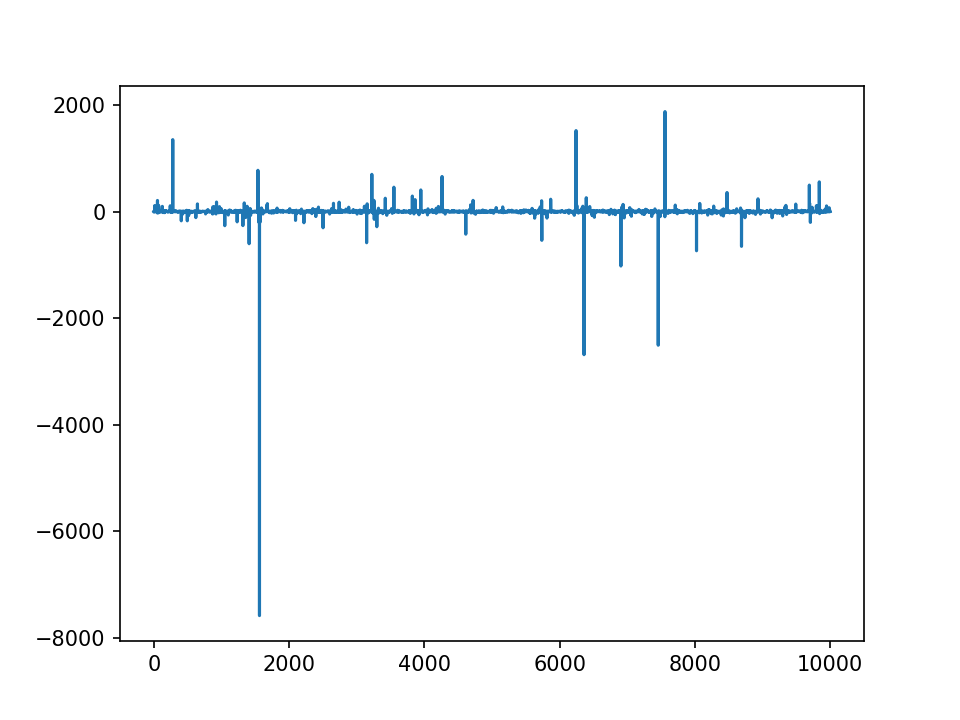

In [12]:
N = 10000
x = np.random.standard_cauchy(N)

fig, ax = plt.subplots()
ax.plot(x)

In [13]:
np.random.standard_cauchy?

# PSD simulation

In [60]:
%matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, fftfreq

N = 10000
del_t = 25e-6

data = np.random.random(N)
binary_1 = [-1 if x <0.5 else 1 for x in data]
binary_2 = [-1 if x <0.05 else 1 for x in data]
binary_3 = [-1 if x <0.001 else 1 for x in data]
binary = np.column_stack((binary_1, binary_2, binary_3))

freq = fftfreq(N, del_t)
spectrum = np.abs(fft(binary, axis=0))**2 / N * del_t


fig, ax = plt.subplots()
ax.plot(freq[:int(N/2)], np.abs(spectrum[:int(N/2),:]))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(top=5e-3)
ax.grid('both')

Using matplotlib backend: TkAgg


In [55]:
from collections import Counter
Counter(binary_3)

Counter({1: 9999, -1: 1})

# Fit curve for parity spectrum
Ref: Riste et al., Nature comm paper
\begin{equation}
S_P(f) = F^2\frac{4\Gamma_{\rm rts}}{(2\Gamma_{\rm rts})^2 + (2\pi f)^2} + (1-F^2)\Delta t_{\rm exp}
\end{equation}

<IPython.core.display.Javascript object>


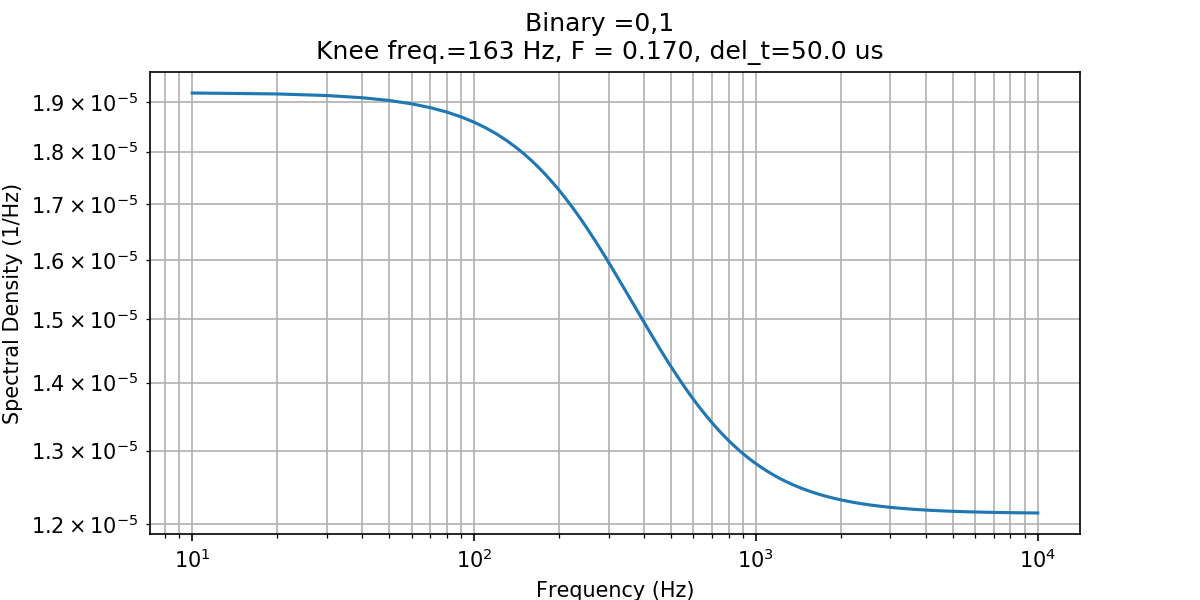

In [26]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

def create_parity_PSD_fit_curve(freq_knee, F, del_t, freq, data_type='-1,1'):
    """
    Args:        
        data_type : '-1,1' or '0,1'
    """
    spectrum = F**2 * 4*(2*np.pi*freq_knee) / ((2*2*np.pi*freq_knee)**2+(2*np.pi*freq_list)**2) \
     + (1 - F**2)*del_t

    if data_type=='0,1':
        spectrum = spectrum / 4

    return spectrum
    
freq_knee, F, del_t, data_type = 163, 0.17, 50e-6, '0,1'
freq_list = np.linspace(10, 1/del_t/2, 1000)
PSD = create_parity_PSD_fit_curve(freq_knee, F, del_t, freq_list, data_type)

fig, ax = plt.subplots(figsize=(8,4))
fig_title = f'Binary =' + data_type + '\n' \
            + f'Knee freq.={freq_knee} Hz, F = {F:.3f}, del_t={del_t/1e-6:.1f} us'
fig.suptitle(fig_title)
ax.plot(freq_list, PSD)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(f'Frequency (Hz)')
ax.set_ylabel(f'Spectral Density (1/Hz)')
# plt.ylim([3e-6,5e-5])
ax.grid(which='both')

In [1]:
plt.plot?

Object `plt.plot` not found.
